### importando bibliotecas

In [1]:
%%python -m pip install --upgrade pip
%pip --quiet install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
def dividir_dados(X, y, train_size, test_size):
    X_treino, X_vt, y_treino, y_vt = train_test_split(X, y, train_size=train_size, random_state=42)
    restante = 1 - train_size
    X_valid, X_teste, y_valid, y_teste = train_test_split(X_vt, y_vt, test_size= test_size / restante, random_state=42)

    return X_treino, X_valid, X_teste, y_treino, y_valid, y_teste

def lda(X_treino, X_valid, X_teste, y_treino, n_components):
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    X_treino_lda = lda.fit_transform(X_treino, y_treino)
    X_valid_lda = lda.transform(X_valid)
    X_teste_lda = lda.transform(X_teste)

    return X_treino_lda, X_valid_lda, X_teste_lda

### KNN - Divisão dos Dados (Treino: 70%, Validação: 10%, Teste: 20%)

-------------------------------------------------------
Tamanho e Proporção dos conjuntos de dados:
  - Conjunto de Treino:     49000 amostras (70.0%)
  - Conjunto de Validação:   7000 amostras (10.0%)
  - Conjunto de Teste:      14000 amostras (20.0%)
-------------------------------------------------------
Métrica: euclidean
Acurácia: 0.9141


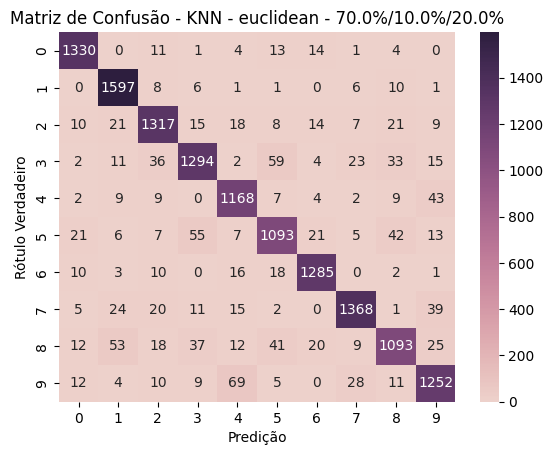


classificações incorretas (1203 no total):


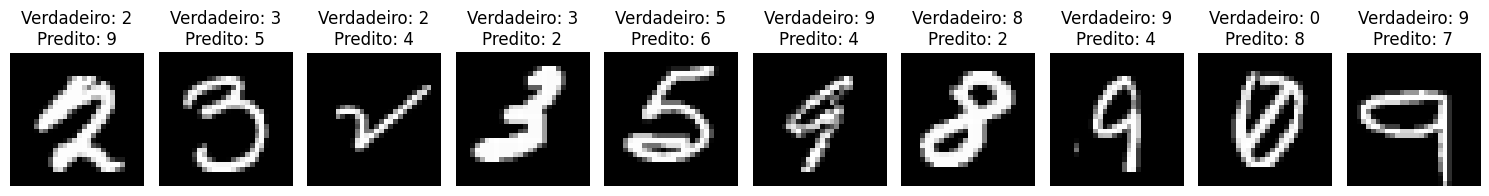




Métrica: manhattan
Acurácia: 0.9134


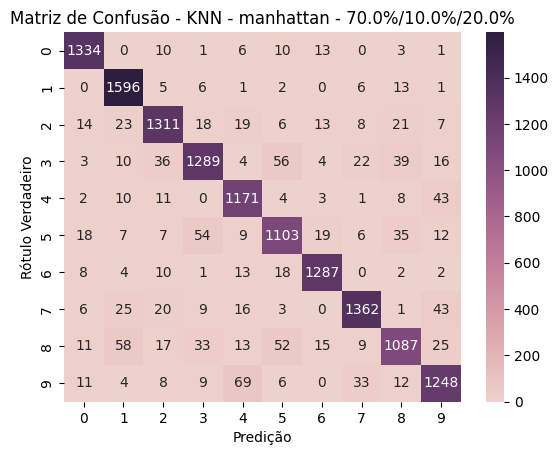


classificações incorretas (1212 no total):


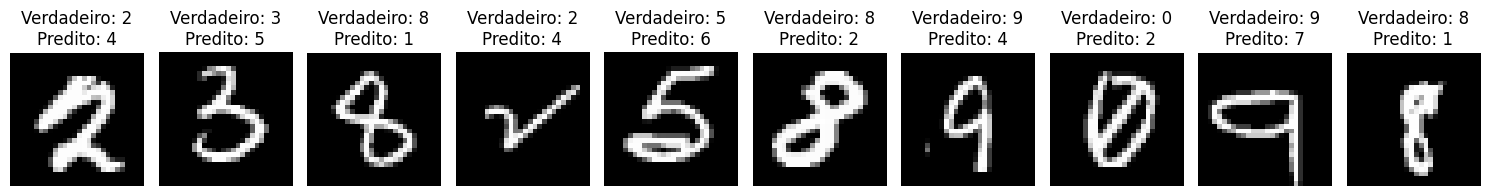




Métrica: cosine
Acurácia: 0.9133


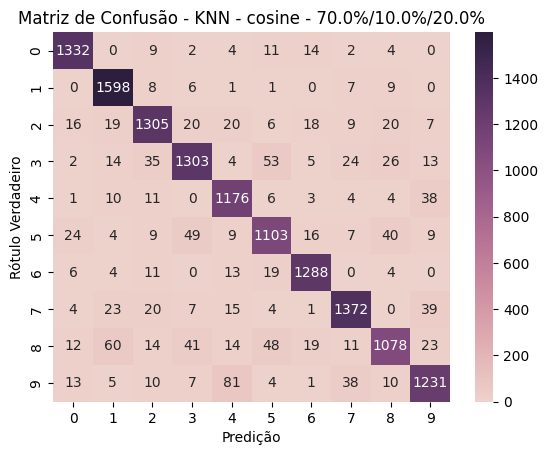


classificações incorretas (1214 no total):


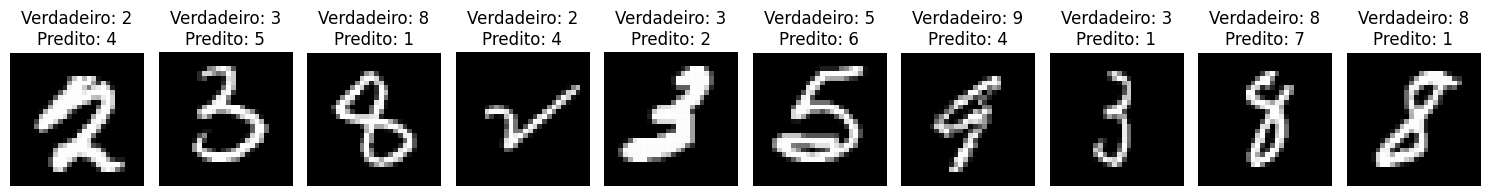

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = np.vstack((X_train, X_test)).reshape(-1, 784).astype(np.float32)
y = np.hstack((y_train, y_test))

X_treino, X_valid, X_teste, y_treino, y_valid, y_teste = dividir_dados(X, y, train_size=0.7, test_size=0.2)


X_treino_lda, X_valid_lda, X_teste_lda = lda(X_treino, X_valid, X_teste, y_treino, n_components=9)


print("-" * 55)
print("Tamanho e Proporção dos conjuntos de dados:")
print(f"  - Conjunto de Treino:    {len(X_treino):>6} amostras ({len(X_treino)/len(X):.1%})")
print(f"  - Conjunto de Validação: {len(X_valid):>6} amostras ({len(X_valid)/len(X):.1%})")
print(f"  - Conjunto de Teste:     {len(X_teste):>6} amostras ({len(X_teste)/len(X):.1%})")
print("-" * 55)

for metrica in ['euclidean', 'manhattan', 'cosine']:
  print(f'Métrica: {metrica}')

  knn = KNeighborsClassifier(n_neighbors=9, metric=metrica, n_jobs=-1)
  knn.fit(X_treino_lda, y_treino)
  y_predito = knn.predict(X_teste_lda)

  acuracia = np.mean(y_predito == y_teste)
  print(f'Acurácia: {acuracia:.4f}')

  matriz_confusao = confusion_matrix(y_teste, y_predito)
  sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
  plt.title(f'Matriz de Confusão - KNN - {metrica} - {len(X_treino)/len(X):.1%}/{len(X_valid)/len(X):.1%}/{len(X_teste)/len(X):.1%}')
  plt.xlabel('Predição')
  plt.ylabel('Rótulo Verdadeiro')
  plt.show()

  indices_erros = np.where(y_predito != y_teste)[0]

  if len(indices_erros) > 0:
    print(f"\nclassificações incorretas ({len(indices_erros)} no total):")

    num_exemplos = min(10, len(indices_erros))
    fig, eixos = plt.subplots(1, num_exemplos, figsize=(15, 3))

    if num_exemplos == 1:
      eixos = [eixos]

    for i, idx in enumerate(indices_erros[:num_exemplos]):
      imagem = X_teste[idx]

      imagem = imagem.reshape(28, 28)

      eixos[i].imshow(imagem, cmap='gray')
      eixos[i].set_title(f'Verdadeiro: {y_teste[idx]}\nPredito: {y_predito[idx]}')
      eixos[i].axis('off')

    plt.tight_layout()
    plt.show()
    print("\n\n")

### KNN - Divisão dos Dados (Treino: 80%, Validação: 10%, Teste: 10%)

-------------------------------------------------------
Tamanho e Proporção dos conjuntos de dados:
  - Conjunto de Treino:     56000 amostras (80.0%)
  - Conjunto de Validação:   6999 amostras (10.0%)
  - Conjunto de Teste:       7001 amostras (10.0%)
-------------------------------------------------------
Métrica: euclidean
Acurácia: 0.9193


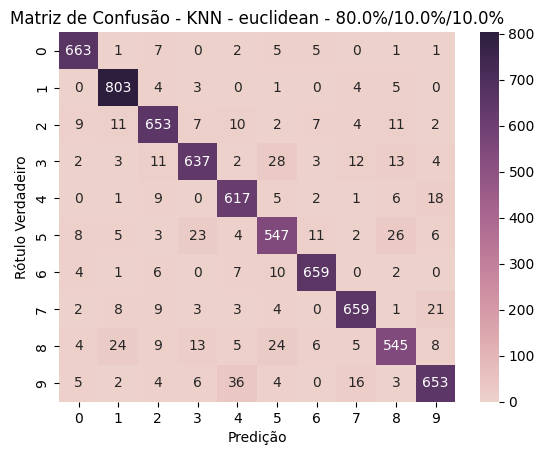


classificações incorretas (565 no total):


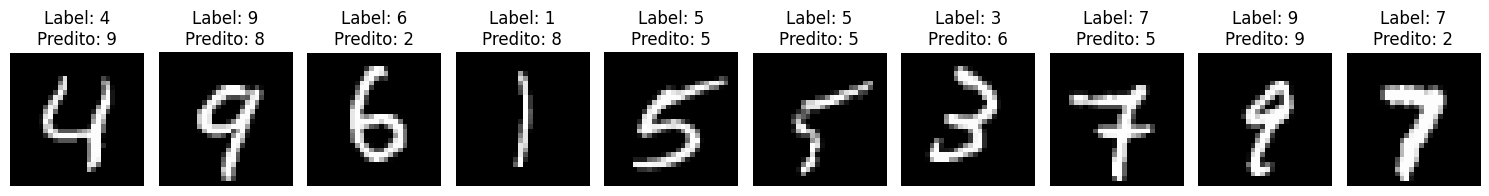



-------------------------------------------------------
Métrica: manhattan
Acurácia: 0.9170


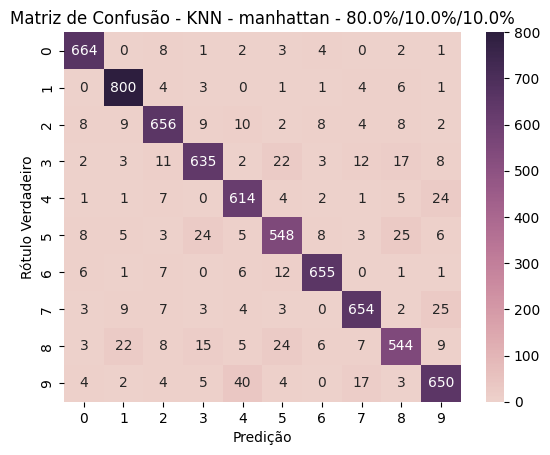


classificações incorretas (581 no total):


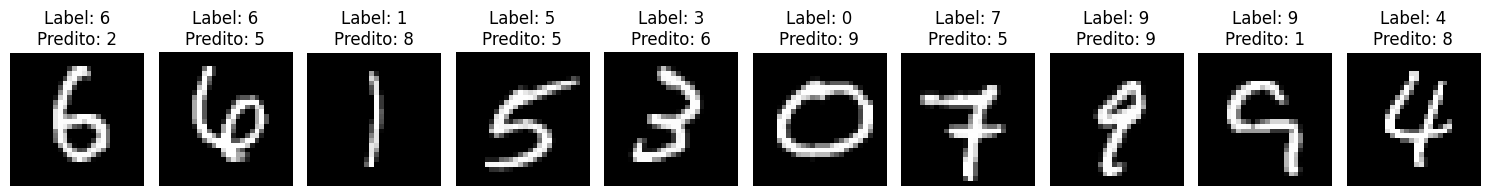



-------------------------------------------------------
Métrica: cosine
Acurácia: 0.9132


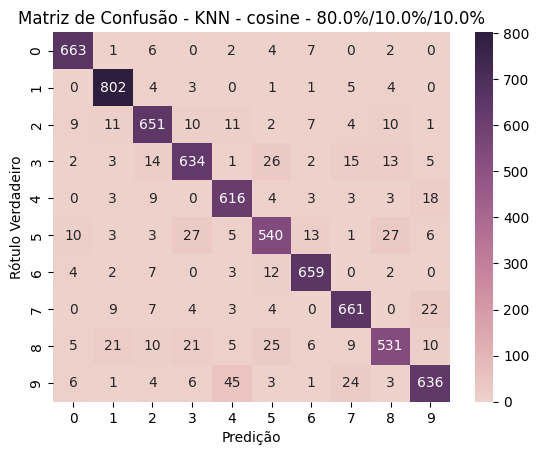


classificações incorretas (608 no total):


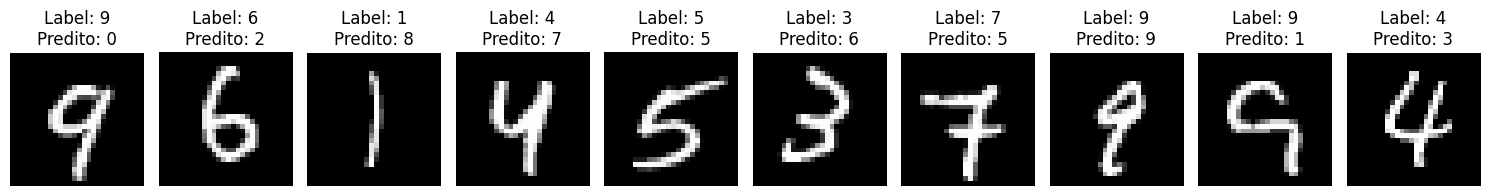



-------------------------------------------------------


In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = np.vstack((X_train, X_test)).reshape(-1, 784).astype(np.float32)
y = np.hstack((y_train, y_test))

X_treino, X_valid, X_teste, y_treino, y_valid, y_teste = dividir_dados(X, y, train_size=0.8, test_size=0.1)

X_treino_lda, X_valid_lda, X_teste_lda = lda(X_treino, X_valid, X_teste, y_treino, n_components=9)

print("-" * 55)
print("Tamanho e Proporção dos conjuntos de dados:")
print(f"  - Conjunto de Treino:    {len(X_treino_lda):>6} amostras ({len(X_treino_lda)/len(X):.1%})")
print(f"  - Conjunto de Validação: {len(X_valid_lda):>6} amostras ({len(X_valid_lda)/len(X):.1%})")
print(f"  - Conjunto de Teste:     {len(X_teste_lda):>6} amostras ({len(X_teste_lda)/len(X):.1%})")
print("-" * 55)

for metrica in ['euclidean', 'manhattan', 'cosine']:
  print(f'Métrica: {metrica}')

  knn = KNeighborsClassifier(n_neighbors=9, metric=metrica, n_jobs=-1)
  knn.fit(X_treino_lda, y_treino)
  y_predito = knn.predict(X_teste_lda)

  acuracia = np.mean(y_predito == y_teste)
  print(f'Acurácia: {acuracia:.4f}')

  matriz_confusao = confusion_matrix(y_teste, y_predito)
  sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
  plt.title(f'Matriz de Confusão - KNN - {metrica} - {len(X_treino_lda)/len(X):.1%}/{len(X_valid_lda)/len(X):.1%}/{len(X_teste_lda)/len(X):.1%}')
  plt.xlabel('Predição')
  plt.ylabel('Rótulo Verdadeiro')
  plt.show()

  indices_erros = np.where(y_predito != y_teste)[0]

  if len(indices_erros) > 0:
    print(f"\nclassificações incorretas ({len(indices_erros)} no total):")

    num_exemplos = min(10, len(indices_erros))
    fig, eixos = plt.subplots(1, num_exemplos, figsize=(15, 3))

    if num_exemplos == 1:
        eixos = [eixos]

    for i, idx in enumerate(indices_erros[:num_exemplos]):
      imagem = X_test[idx]

      imagem = imagem.reshape(28, 28)

      eixos[i].imshow(imagem, cmap='gray')
      eixos[i].set_title(f'Label: {y_test[idx]}\nPredito: {y_predito[idx]}')
      eixos[i].axis('off')

    plt.tight_layout()
    plt.show()
    print("\n")
    print("-" * 55)
  else:
      print("Nenhum erro de classificação encontrado!")

### SVM com kernel linear - Divisão dos Dados (Treino: 70%, Validação: 10%, Teste: 20%)

-------------------------------------------------------
Tamanho e Proporção dos conjuntos de dados:
  - Conjunto de Treino:     49000 amostras (70.0%)
  - Conjunto de Validação:   7000 amostras (10.0%)
  - Conjunto de Teste:      14000 amostras (20.0%)
-------------------------------------------------------
=== Classificador SVM ===
Acurácia na validação: 0.8869
Acurácia no teste: 0.8910


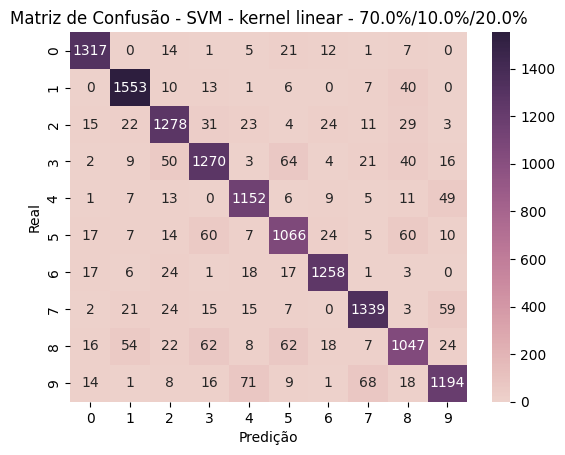

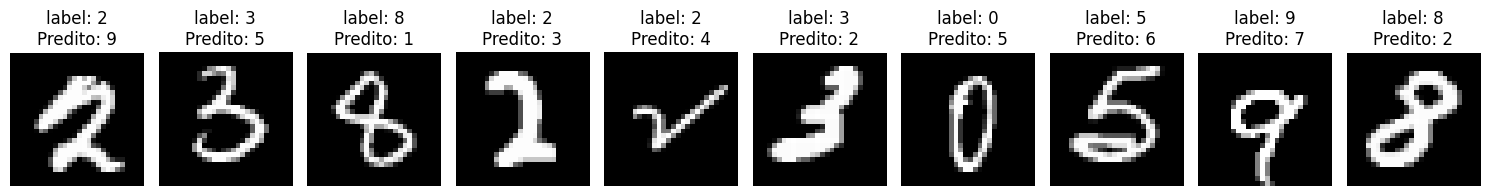

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = np.vstack((X_train, X_test)).reshape(-1, 784).astype(np.float32)
y = np.hstack((y_train, y_test))

X_treino, X_valid, X_teste, y_treino, y_validacao, y_teste = dividir_dados(X, y, train_size=0.7, test_size=0.2)


X_treino_lda, X_validacao_lda, X_teste_lda = lda(X_treino, X_valid, X_teste, y_treino, n_components=9)


print("-" * 55)
print("Tamanho e Proporção dos conjuntos de dados:")
print(f"  - Conjunto de Treino:    {len(X_treino):>6} amostras ({len(X_treino)/len(X):.1%})")
print(f"  - Conjunto de Validação: {len(X_validacao_lda):>6} amostras ({len(X_validacao_lda)/len(X):.1%})")
print(f"  - Conjunto de Teste:     {len(X_teste):>6} amostras ({len(X_teste)/len(X):.1%})")
print("-" * 55)

print("=== Classificador SVM ===")
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_treino_lda, y_treino)

y_validacao_pred = svm.predict(X_validacao_lda)
acuracia_validacao = accuracy_score(y_validacao, y_validacao_pred)
print(f"Acurácia na validação: {acuracia_validacao:.4f}")

y_teste_pred = svm.predict(X_teste_lda)
acuracia_teste = accuracy_score(y_teste, y_teste_pred)
print(f"Acurácia no teste: {acuracia_teste:.4f}")

cm = confusion_matrix(y_teste, y_teste_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.title(f'Matriz de Confusão - SVM - kernel linear - {len(X_treino_lda)/len(X):.1%}/{len(X_valid_lda)/len(X):.1%}/{len(X_teste_lda)/len(X):.1%}')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

indices_erros = np.where(y_teste_pred != y_teste)[0]
num_exemplos = min(10, len(indices_erros))
fig, eixos = plt.subplots(1, num_exemplos, figsize=(15, 3))

if num_exemplos == 1:
    eixos = [eixos]

for i, idx in enumerate(indices_erros[:num_exemplos]):
  imagem = X_teste[idx].reshape(28, 28)
  eixos[i].imshow(imagem, cmap='gray')
  eixos[i].set_title(f'label: {y_teste[idx]}\nPredito: {y_teste_pred[idx]}')
  eixos[i].axis('off')

plt.tight_layout()
plt.show()


### SVM com kernel linear - Divisão dos Dados (Treino: 80%, Validação: 10%, Teste: 10%)

-------------------------------------------------------
Tamanho e Proporção dos conjuntos de dados:
  - Conjunto de Treino:     56000 amostras (80.0%)
  - Conjunto de Validação:   6999 amostras (10.0%)
  - Conjunto de Teste:       7001 amostras (10.0%)
-------------------------------------------------------
=== Classificador SVM ===
Acurácia na validação: 0.8884
Acurácia no teste: 0.8920


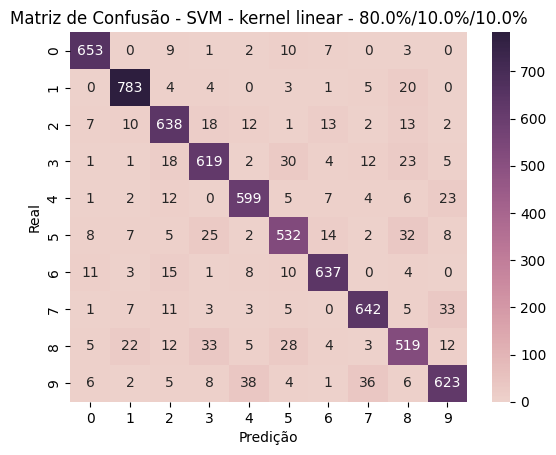

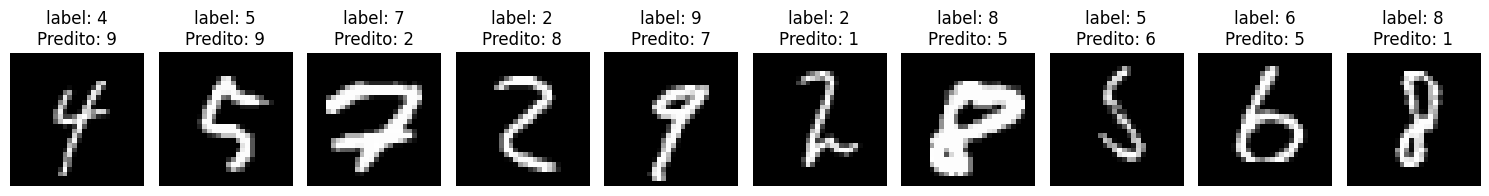

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = np.vstack((X_train, X_test)).reshape(-1, 784).astype(np.float32)
y = np.hstack((y_train, y_test))

X_treino, X_valid, X_teste, y_treino, y_validacao, y_teste = dividir_dados(X, y, train_size=0.8, test_size=0.1)


X_treino_lda, X_validacao_lda, X_teste_lda = lda(X_treino, X_valid, X_teste, y_treino, n_components=9)


print("-" * 55)
print("Tamanho e Proporção dos conjuntos de dados:")
print(f"  - Conjunto de Treino:    {len(X_treino):>6} amostras ({len(X_treino)/len(X):.1%})")
print(f"  - Conjunto de Validação: {len(X_validacao_lda):>6} amostras ({len(X_validacao_lda)/len(X):.1%})")
print(f"  - Conjunto de Teste:     {len(X_teste):>6} amostras ({len(X_teste)/len(X):.1%})")
print("-" * 55)

print("=== Classificador SVM ===")
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_treino_lda, y_treino)

y_validacao_pred = svm.predict(X_validacao_lda)
acuracia_validacao = accuracy_score(y_validacao, y_validacao_pred)
print(f"Acurácia na validação: {acuracia_validacao:.4f}")

y_teste_pred = svm.predict(X_teste_lda)
acuracia_teste = accuracy_score(y_teste, y_teste_pred)
print(f"Acurácia no teste: {acuracia_teste:.4f}")

cm = confusion_matrix(y_teste, y_teste_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.title(f'Matriz de Confusão - SVM - kernel linear - {len(X_treino_lda)/len(X):.1%}/{len(X_valid_lda)/len(X):.1%}/{len(X_teste_lda)/len(X):.1%}')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

indices_erros = np.where(y_teste_pred != y_teste)[0]
num_exemplos = min(10, len(indices_erros))
fig, eixos = plt.subplots(1, num_exemplos, figsize=(15, 3))

if num_exemplos == 1:
    eixos = [eixos]

for i, idx in enumerate(indices_erros[:num_exemplos]):
  imagem = X_teste[idx].reshape(28, 28)
  eixos[i].imshow(imagem, cmap='gray')
  eixos[i].set_title(f'label: {y_teste[idx]}\nPredito: {y_teste_pred[idx]}')
  eixos[i].axis('off')

plt.tight_layout()
plt.show()
